# Colab Start Section

Step 1 is to upload a copy of your private key. I am assuming your private key is named id_ed25519. If that isn't the case, you'll have to make manual changes.

In [29]:
# Change these of course to what is your email and your GitHub username
EMAIL = "pauleanderson@gmail.com"
USERNAME = "instructor"

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
%%bash -s "$EMAIL" "$USERNAME"

rm -rf /root/.ssh/*
mkdir /root/.ssh

mv id_ed25519 /root/.ssh/

chmod 600 /root/.ssh/id_ed25519

git config --global user.email "$1"
git config --global user.name "$2"

In [2]:
%%bash -s "$USERNAME"

eval "$(ssh-agent -s)"

ssh-add ~/.ssh/id_ed25519

ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts

git clone git@github.com:anderson-fall-2024/csc-448-$1.git

UsageError: Cell magic `%%shell` not found.


# Topic 6 - Are there fragile regions in the human genome?

## Combinatorial Algorithms - Chapter 6
Motivation and some exercises are variations on those available in Bioinformatics Algorithms: An Active-Learning Approach by Phillip Compeau & Pavel Pevzner.

In [30]:
#### NO NEED TO EDIT ####
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.insert(0,f"csc-448-{USERNAME}")
sys.path.insert(0,"..")

from py448 import Topic6_helper

#### NO NEED TO EDIT ####

import altair as alt
alt.renderers.enable('html')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


RendererRegistry.enable('html')

## Ice breaker

What is the best candy bar?

## Rearrangements in Tumor Genomes
Before we go forward with terminology, background, and algorithms, let's take a look at a success story.
### A win that shows why many of us work in bioinformatics...
<img src="http://bioinformaticsalgorithms.com/images/Rearrangements/Philadelphia_chromosome.png" width=600>

* Rare form of cancer called chronic myeloid leukemia (CML)
* Involves the rearrangement of human chromosomes 9 and 22
* Once scientists understood the root cause of CML, they started searching for a compound inhibiting ABL-BCR, which resulted in the introduction of a drug called Gleevec in 2001.

## Background and terminology
What is a genomic rearrangement?
* You can think of it as a "genomic earthquake" that dramatically changes the chromosomal architecture of an organism

**Stop and think:** What other changes have we been talking about before in this class?

* Point mutations - work slowly and are analogous to "genomic erosion"

What is a central theme when studying genomic rearrangement?
* Earthquakes that occur more frequently along fault lines. We want to know if a similar principal holds for genomic regions

We call these potential fault lines in the genome **rearrangement hotspots**. If these hotspots exist, we want to locate them and determine how they might relate to genetic disorders.

Because the true rearrangement scenario is unknown, it is not immediately clear how we could determine whether rearrangement hotspots exist.

# Of Mice and Men
* Nearly every human gene has a mouse counterpart
* We even have genes that make tails, but those are silenced

So the question is:
> What evolutionary forces have transformed the genome of the human-mouse ancestor into the present-day human and mouse genomes?



## Genome rearrangement
* You can cut the 23 human chromosomes into 280 pieces, shuffle these DNA fragments and then glue the pieces together in a new order to form the 20 mouse chromosomes
* In this chapter and lab we will work to understand the genome rearrangements that have separated the human and mouse genomes

## Quick word about the X chromosome
* One of two sex-determining chromosomes in mammals
* It's retained nearly all its genes throughout mammalian evolution
* We can view it as a mini-genome because this chromosome's genes have not jumped onto different chromosomes

## Synteny blocks
* Genes across species often appear in procession
* This is known as a synteny block
* Constructing these blocks simplifies our problem from 150 million base pairs on the X chromosome to only eleven units

<img src="http://bioinformaticsalgorithms.com/images/Rearrangements/mouse_and_human_synteny_blocks.png">
Color and shape indicate a block. Direction indicated by arrow head. Note that some blocks are longer than others.

## Reversal Genome Rearrangment
* Flips around an interval of a chromosome and inverts the directions of any synteny blocks within that interval
* Genome rearrangements typically cause the death or sterility of the mutated organism
* So they are pretty rare
* A tiny fraction may have a positive effect on survival and propagate

**Stop and think (5 mins individual and then a few more minutes with folks near you):** Can you go from mouse to human in 7 moves?

<img src="https://docs.google.com/drawings/d/e/2PACX-1vTipOfR48sRPj13b4H9BSHq2RNdVOc320leFCSv0igxByC1SI4uncM0YnJI7bJAeHJou26lw5iXORam/pub?w=1245&h=498">

Anwser: How do we go from human to mouse (and is this the only way we can do so with 7 changes)? 
<img src="http://bioinformaticsalgorithms.com/images/Rearrangements/transforming_mouse_into_human_7_reversals.png">

## Random Breakage Model
* 1973, Susumu Ohno proposed the Random Breakage Model of chromosome evolution
* Hypothesizes that the breakage points of rearrangements are selected randomly
* Implies that rearrangement hotspots in mammalian genomes do not exist
* Yet Ohno's model lacked supporting evidence when it was introduced

## Replicating a computational experiment

* In 1984, Joseph Nadeau and Benjamin Taylor asked what the expected lengths of synteny blocks should be after N reversals occurring at random locations in the genome.
* Rule out the unlikely event that two random reversals cut the chromosome in exactly the same position
* Assuming this, N random reversals cut the chromosome in 2N locations and produce 2N + 1 synteny blocks
* We will simulate this with 25,000 genes and 320 random reversals resulting in 2*320+1=641 synteny blocks

**Exercise 1 (optional and not graded)**: Simulating reversals

Using the method descried above, I want you to write a simulation that cuts the chromosome into blocks. You should end up with 2N+1 blocks (N=320 below). The autograder is going to look at the distribution of the lengths of your blocks. This is a stochastic simulation, so the autograder has run this simulation many times, and it is aware of reasonable levels of variation. 

In [31]:
import pandas as pd
ngenes = 25000
chromosome = ["g%d"%i for i in range(ngenes)]
pd.Series(chromosome)

0            g0
1            g1
2            g2
3            g3
4            g4
          ...  
24995    g24995
24996    g24996
24997    g24997
24998    g24998
24999    g24999
Length: 25000, dtype: object

In [34]:
%matplotlib inline 

bins = [0. ,  27.8,  55.6,  83.4, 111.2, 139. , 166.8, 194.6, 222.4, 250.2, 278.]
# YOUR SOLUTION HERE
counts,centers = np.histogram(lens,bins=bins)
counts

array([340, 157,  61,  40,  19,  15,   4,   1,   2,   1])

In [35]:
bins

[0.0, 27.8, 55.6, 83.4, 111.2, 139.0, 166.8, 194.6, 222.4, 250.2, 278.0]

In [36]:
alt.Chart(pd.DataFrame({"count":counts,"length":bins[1:]})).mark_bar().encode(
    x='length',
    y='count'
)

alt.Chart(...)

## Why simulate and a greedy heuristic?
I find it very useful to simulate my own data if for no other reason than to enhance my understanding. Since you've done a simulation, consider this:

> If I gave you the blocks you arrived at in the end, can you tell me how we arrived at them?

Consider the greedy heuristic next...

### Greedy Heuristic
Simple idea that says to perform reversals that fix +1 in the first position. Followed by reversals that fix +2 in the second position and so on. By iterating we can move larger and larger elements into their correct positions.
<pre>
(+1 −7 +6 −10 +9 −8 +2 −11 −3 +5 +4)
(+1 −2 +8 −9 +10 −6 +7 −11 −3 +5 +4)
(+1 +2 +8 −9 +10 −6 +7 −11 −3 +5 +4)
(+1 +2 +3 +11 −7 +6 −10 +9 −8 +5 +4)
</pre>
**Stop and think:** Take 3-5 minutes on paper and try to finish. 

Rest of the greedy solution:
<pre>
(+1 +2 +3 −4 −5 +8 −9 +10 −6 +7 −11)
(+1 +2 +3 +4 −5 +8 −9 +10 −6 +7 −11)
(+1 +2 +3 +4 +5 +8 −9 +10 −6 +7 −11)
(+1 +2 +3 +4 +5 +6 −10 +9 −8 +7 −11)
(+1 +2 +3 +4 +5 +6 −7 +8 −9 +10 −11)
(+1 +2 +3 +4 +5 +6 +7 +8 −9 +10 −11)
(+1 +2 +3 +4 +5 +6 +7 +8 +9 +10 −11)
(+1 +2 +3 +4 +5 +6 +7 +8 +9 +10 +11)
</pre>

**Stop and think:** Take another minute and jot down some pseudocode about how you would implement this in a function

**Exercise 2**: Greedy heuristic for sorting by reversals

For this exercise, I want you to implement the greedy heuristic as described here and in Chapter 6. 

Input: $P$ - signed permutation (pandas Series object)

Output: $d_{rev}(P)$ - number of reversals

In [37]:
P_list = [1,-7,6,-10,9,-8,2,-11,-3,5,4]
P = pd.Series(P_list,index=list(range(1,len(P_list)+1)))

print("Target:")
print("\t".join(P.index.astype(str)))
print("Solution trace:")
approx_rev_distance = Topic6_helper.greedy_sorting(P)
print("Approximate reversal distance:",approx_rev_distance)

1	-7	6	-10	9	-8	2	-11	-3	5	4
1	-2	8	-9	10	-6	7	-11	-3	5	4
1	2	8	-9	10	-6	7	-11	-3	5	4
1	2	3	11	-7	6	-10	9	-8	5	4
1	2	3	-4	-5	8	-9	10	-6	7	-11
1	2	3	4	-5	8	-9	10	-6	7	-11
1	2	3	4	5	8	-9	10	-6	7	-11
1	2	3	4	5	6	-10	9	-8	7	-11
1	2	3	4	5	6	-7	8	-9	10	-11
1	2	3	4	5	6	7	8	-9	10	-11
1	2	3	4	5	6	7	8	-9	10	-11
1	2	3	4	5	6	7	8	9	10	-11
1	2	3	4	5	6	7	8	9	10	-11
1	2	3	4	5	6	7	8	9	10	11
Target:
1	2	3	4	5	6	7	8	9	10	11
Solution trace:
1	-7	6	-10	9	-8	2	-11	-3	5	4
1	-2	8	-9	10	-6	7	-11	-3	5	4
1	2	8	-9	10	-6	7	-11	-3	5	4
1	2	3	11	-7	6	-10	9	-8	5	4
1	2	3	-4	-5	8	-9	10	-6	7	-11
1	2	3	4	-5	8	-9	10	-6	7	-11
1	2	3	4	5	8	-9	10	-6	7	-11
1	2	3	4	5	6	-10	9	-8	7	-11
1	2	3	4	5	6	-7	8	-9	10	-11
1	2	3	4	5	6	7	8	-9	10	-11
1	2	3	4	5	6	7	8	-9	10	-11
1	2	3	4	5	6	7	8	9	10	-11
1	2	3	4	5	6	7	8	9	10	-11
1	2	3	4	5	6	7	8	9	10	11
Approximate reversal distance: 11


## Moving past our greedy solution
We are going to move towards creating what are known as breakpoint graphs. A natural question then is "What is a breakpoint?" My favorite way to understanding the world... If I can code it, I understand it (probably :)

## Breakpoints
Put simply breakpoints are located in between adjacent blocks (a,b) that do not differ by 1. i.e., b-a=1

* Breakpoint exists between (5,7) ... 7-5=2
* Breakpoint does not exist between (5,6) ... 6-5=1
* Breakpoint does not exist between (-7,-6) ... -6--7=1
* Breakpoints also exist at the beginning and the end when the beginning is not 1 and the end is not equal to the number of blocks

**Stop and think:** Take 2-3 minutes and see if you and those around you can work out the number of breakpoints in:
<pre>
(3 4 5 -12 -8 -7 -6 1 2 10 9 -11 13 14)
</pre>

Does a breakpoint exist between (10,9)?

Yes. Consider if you just rearranged it without breaking. You would get (-9,-10). The only way this can be fixed so that it is (9,10) is if there is at least point breakpoint between 9 and 10.

**Exercise 3**: Number of breakpoints problem

For this exercise, I want you to find the number of breakpoints in a permutation. 

Input: $P$ - signed permutation (pandas Series object)

Output: Number of breakpoints in this permutation

In [38]:
import pandas as pd

P_list2 = [3,4,5,-12,-8,-7,-6,1,2,10,9,-11,13,14]
P2 = pd.Series(P_list2,index=list(range(1,len(P_list2)+1)))
nbreakpoints_P2 = Topic6_helper.count_breakpoints(P2)
P_list3 = [3,4,5,-12,-8,-7,-6,1,2,10,9,-11,14,13]
P3 = pd.Series(P_list3,index=list(range(1,len(P_list2)+1)))
nbreakpoints_P3 = Topic6_helper.count_breakpoints(P3)
nbreakpoints_P2,nbreakpoints_P3

(8, 10)

## From Unichromosomal to Multichromosomal Genomes
Four types of rearrangements
 * reversals
 * translocations - exchanges segments of different chromosomes
 * fusions - fuse two chromosomes
 * fissions - split a chromosome into two

**Translocation example**

In [39]:
chromosome1 = [1,2,3,4,5,6]; chromosome2 = [7,8,9,10,11]
cut1 = 4; cut2 = 2 # inclusive indices of the cuts
chromosome1a = chromosome1[:cut1]
chromosome1b = chromosome1[cut1:]
chromosome2a = chromosome2[:cut2]
chromosome2b = chromosome2[cut2:]
new_chromosome1 = chromosome1a + chromosome2b
new_chromosome2 = chromosome2a + chromosome1b
print(tuple(chromosome1a),tuple(chromosome1b));print(tuple(chromosome2a),tuple(chromosome2b));print(tuple(new_chromosome1),tuple(new_chromosome2))

(1, 2, 3, 4) (5, 6)
(7, 8) (9, 10, 11)
(1, 2, 3, 4, 9, 10, 11) (7, 8, 5, 6)


You guessed it... Now it is time for more graphs
<img src="http://bioinformaticsalgorithms.com/images/Rearrangements/genome_graph.png" width=400>

> Figure: A genome with two circular chromosomes, (+a −b −c +d) and (+e +f +g +h +i +j). Grey directed edges represent synteny blocks, and red undirected edges connect adjacent synteny blocks. A circular chromosome with n﻿ elements can be written in 2n different ways; the chromosome on the left can be written as (+a −b −c +d), (−b −c +d +a), (−c +d +a −b), (+d +a −b −c), (−a −d +c +b) (−d +c +b −a), (+c +b −a −d), and (+b −a −d +c).

**Some notes on our graphs this week**
* Color is going to be meaningful
* Positive and negative is going to be meaningful
* Our graphs are going to be undirected networkx graphs, but we will put +/- on the vertices to show the direction like the last slide.

Grey is going to mean exactly what is shown above.

We will also use red, blue, and purple. Why... red + blue makes purple.

I've included different functions in the notebook that assumes you are using these colors.

**Exercise 4**: Representing a graph

For this exercise, I want you to adopt a specific format for representing the genome graphs. We can't easily construct the arrow (directed and undirected), but we can come up with a straightforward way to represent it.

Input: genome - a list of signed permutation (pandas Series objects)

Output: A networkx graph

**Helper functions are supplied in the helper file.**

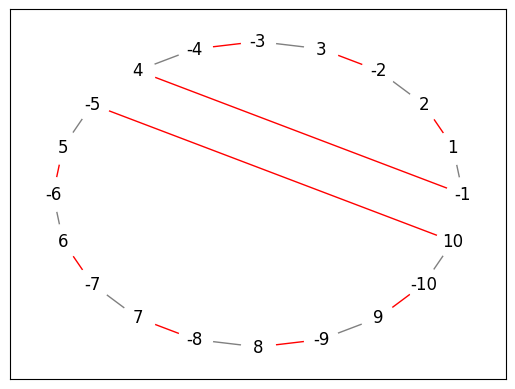

In [40]:
G = Topic6_helper.genome_to_graph([pd.Series([1,-2,-3,4]),pd.Series([5,6,7,8,9,10])])
Topic6_helper.show(G)

## What is a breakpoint graph and why make one?
We can take two graphs like the one above, and combine them to make a breakpoint graph. Our algorithms can then work on the breakpoint graph (to come a bit later). Skip paste exercise 5 to see examples of the breakpoint graphs.

**Exercise 5**: Creating a breakpoint graph

For this exercise, I want you to construct a breakpoint graph. Again, I use a slightly different notation than the one in the book, but the results are the same.

Input: two genomes where a genome is a list of signed permutation (pandas Series objects)

Output: A networkx graph

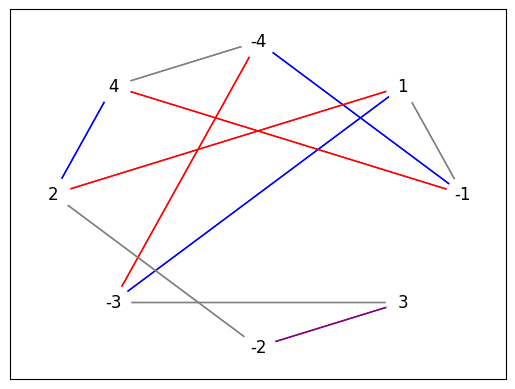

In [41]:
P4_list = [1,-2,-3,4]
P4 = pd.Series(P4_list)
P5_list = [1,3,2,-4]
P5 = pd.Series(P5_list)

G_P4_P5 = Topic6_helper.combine(Topic6_helper.genome_to_graph([P4]),Topic6_helper.genome_to_graph([P5]))
Topic6_helper.show_combined(G_P4_P5)

## Example breakpoint graphs
* Below you will see the different ways you can visualize them
* This is to demonstrate the semantics of the colors
* And to demonstrate the function I provide for you

Consider what the purple means?

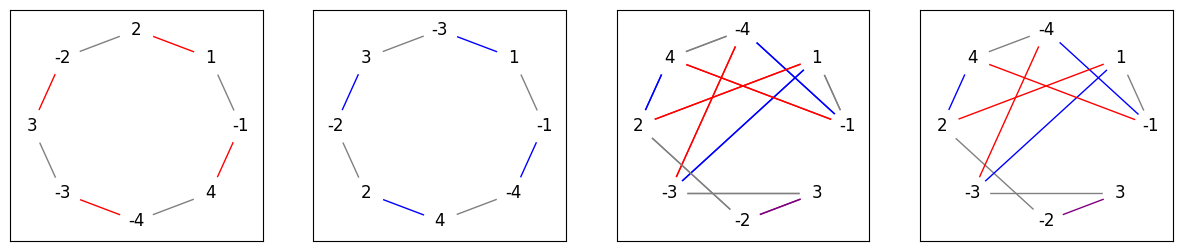

In [42]:
G4 = Topic6_helper.genome_to_graph([P4])
G5 = Topic6_helper.genome_to_graph([P5])

import matplotlib.pyplot as plt
f,axs=plt.subplots(1,4,figsize=(15,3))
plt.subplot(141)
Topic6_helper.show(G4)
plt.subplot(142)
Topic6_helper.show(G5,red_blue=False)
plt.subplot(143)
Topic6_helper.show_combined(Topic6_helper.combine(G4,G5))
plt.subplot(144)
Topic6_helper.show(G4,G5,P_G=Topic6_helper.combine(G4,G5))

You have now made the graphs and the combined graphs. It is this combined graphs that we need to study in order to solve the problem of determine the minimum rearrangement steps. We can see the cycles in the rightmost graph. They alternate between red and blue. Start at a node and do some walking around for a second. 

**Stop and think:** Can you list all of the red-blue alternating cycles in the right most graph?

### Base Case Example
Now let's look at the base case example of combining two of the same graphs (genomes) together.

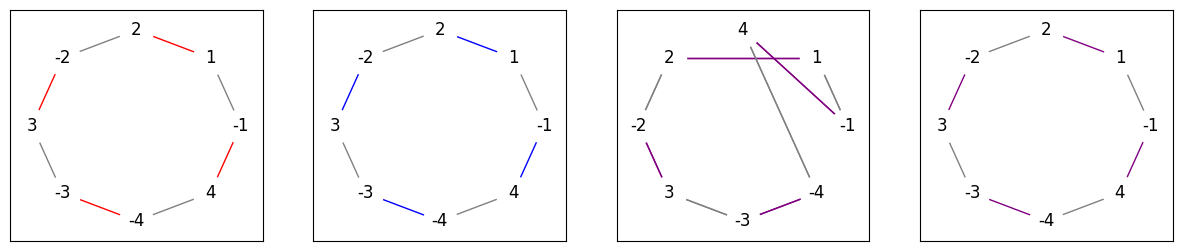

In [43]:
G4 = Topic6_helper.genome_to_graph([P4])
G5 = Topic6_helper.genome_to_graph([P4])

# The rest is for plotting
import matplotlib.pyplot as plt
f,axs=plt.subplots(1,4,figsize=(15,3))
plt.subplot(141)
Topic6_helper.show(G4)
plt.subplot(142)
Topic6_helper.show(G5,red_blue=False)
plt.subplot(143)
Topic6_helper.show_combined(Topic6_helper.combine(G4,G5))
plt.subplot(144)
Topic6_helper.show(G4,G5,P_G=G4)

**Stop and think:** So ... what is the number of red-blue alternating cycles in this best case scenario?

4... or the number of blocks. 

**It follows that if we can break each non-trivial cycle in such a way that each time we generate one new "purple" or trivial cycle, then we have our algorithm.**

Let's pause and make sure we believe that...

Our approach is to find a blue link and break our graph on either side. This is known as the two break distance. A picture from the textbook shows this, and we call this a 2-break.
<img src="http://bioinformaticsalgorithms.com/images/Rearrangements/2-break_breakpoint_graph.png">

**Stop and think:** Convert this to our graph style.

If we know how many 2-breaks we need such that all we are left with are trivial cycles, we know the minimum number of reversals. We also know the reversals. Let's talk about how to build that!

**Exercise 6**: Finding the number of cycles in a combined graph

For this exercise, I want you to determine the number of alternating cycles (red/blue) in the combined graph if you remove the grey links (e.g., (-1,1)).

Input: A combined breakpoint graph

Output: Number of cycles as defined in the textbook as CYCLES(P,Q).

In [44]:
ncycles = Topic6_helper.cycles(Topic6_helper.genome_to_graph([P4]),Topic6_helper.genome_to_graph([P5]))
ncycles

2

**Exercise 7**: Find the number of blocks in a graph

For this exercise, blocks is defined as referenced in the textbook.

Input: G - A genome graph

Output: Number of blocks in a genome graph.

In [45]:
nblocks = Topic6_helper.blocks(Topic6_helper.genome_to_graph([P5]))
nblocks

4

**Exercise 7**: 2-Break Distance Problem

For this exercise, find the 2-break distance between two genomes.

Input: G - Two genomes

Output: 2-break distance

In [46]:
P6_list = [1,2,3,4,5,6]
P6 = pd.Series(P6_list)
P7_list = [1,-3,-6,-5]
P7 = pd.Series(P7_list)
P8_list = [2,-4]
P8 = pd.Series(P8_list)

distance = Topic6_helper.two_break_distance(Topic6_helper.genome_to_graph([P6]),Topic6_helper.genome_to_graph([P7,P8]))
distance

3

**Exercise 8**: Check to see if a cycle alternates between red and blue

For this exercise, blocks is defined as referenced in the textbook.

Input: G - A genome graph

Output: None,None if this is not a red/blue alternating cycle otherwise return the cycle and the colors

In [47]:
import networkx as nx

G_P4_P5 = Topic6_helper.combine(Topic6_helper.genome_to_graph([P4]),Topic6_helper.genome_to_graph([P5]))
# Below is an example for how you can find all the cycles
test_cycles = list(nx.simple_cycles(G_P4_P5.to_directed()))
edge_cycles = [] # just a cycle listed as edges
for cycle in test_cycles:
    edge_cycle = []
    a = cycle[0]
    for b in cycle[1:]:
        edge_cycle.append([a,b])
        a = b
    edge_cycle.append([b,cycle[0]])
    edge_cycles.append(edge_cycle)
# Running the code on all cycles
for edge_cycle in edge_cycles:
    #print(edge_cycle)
    checked_cycle, colors = Topic6_helper.red_blue_cycle_check(G_P4_P5,edge_cycle)
    #print(colors)
    
test_edge_cycle = [[1, -3], [-3, -4], [-4, -1], [-1, 4], [4, 2], [2, 1]]
checked_cycle, colors = Topic6_helper.red_blue_cycle_check(G_P4_P5,test_edge_cycle)
print(checked_cycle)
print(colors)

[[1, -3], [-3, -4], [-4, -1], [-1, 4], [4, 2], [2, 1]]
['blue', 'red', 'blue', 'red', 'blue', 'red']


**Exercise 9**: 2-Break Sorting Problem

Find a shortest transformation of one genome into another by 2-breaks.

Input: Two genomes with circular chromosomes on the same set of synteny blocks (i.e., the usual)

Output: The sequence of genomes resulting from applying a shortest sequence of 2-breaks transforming one genome into the other.

3
[1, -2, -3, 4]
[1, 2, -3, 4]
[1, 2, 3, 4]
[1, 2, -4, -3]


[{(1, -2, -3, 4)}, {(1, 2, -3, 4)}, {(1, 2, 3, 4)}, {(1, 2, -4, -3)}]

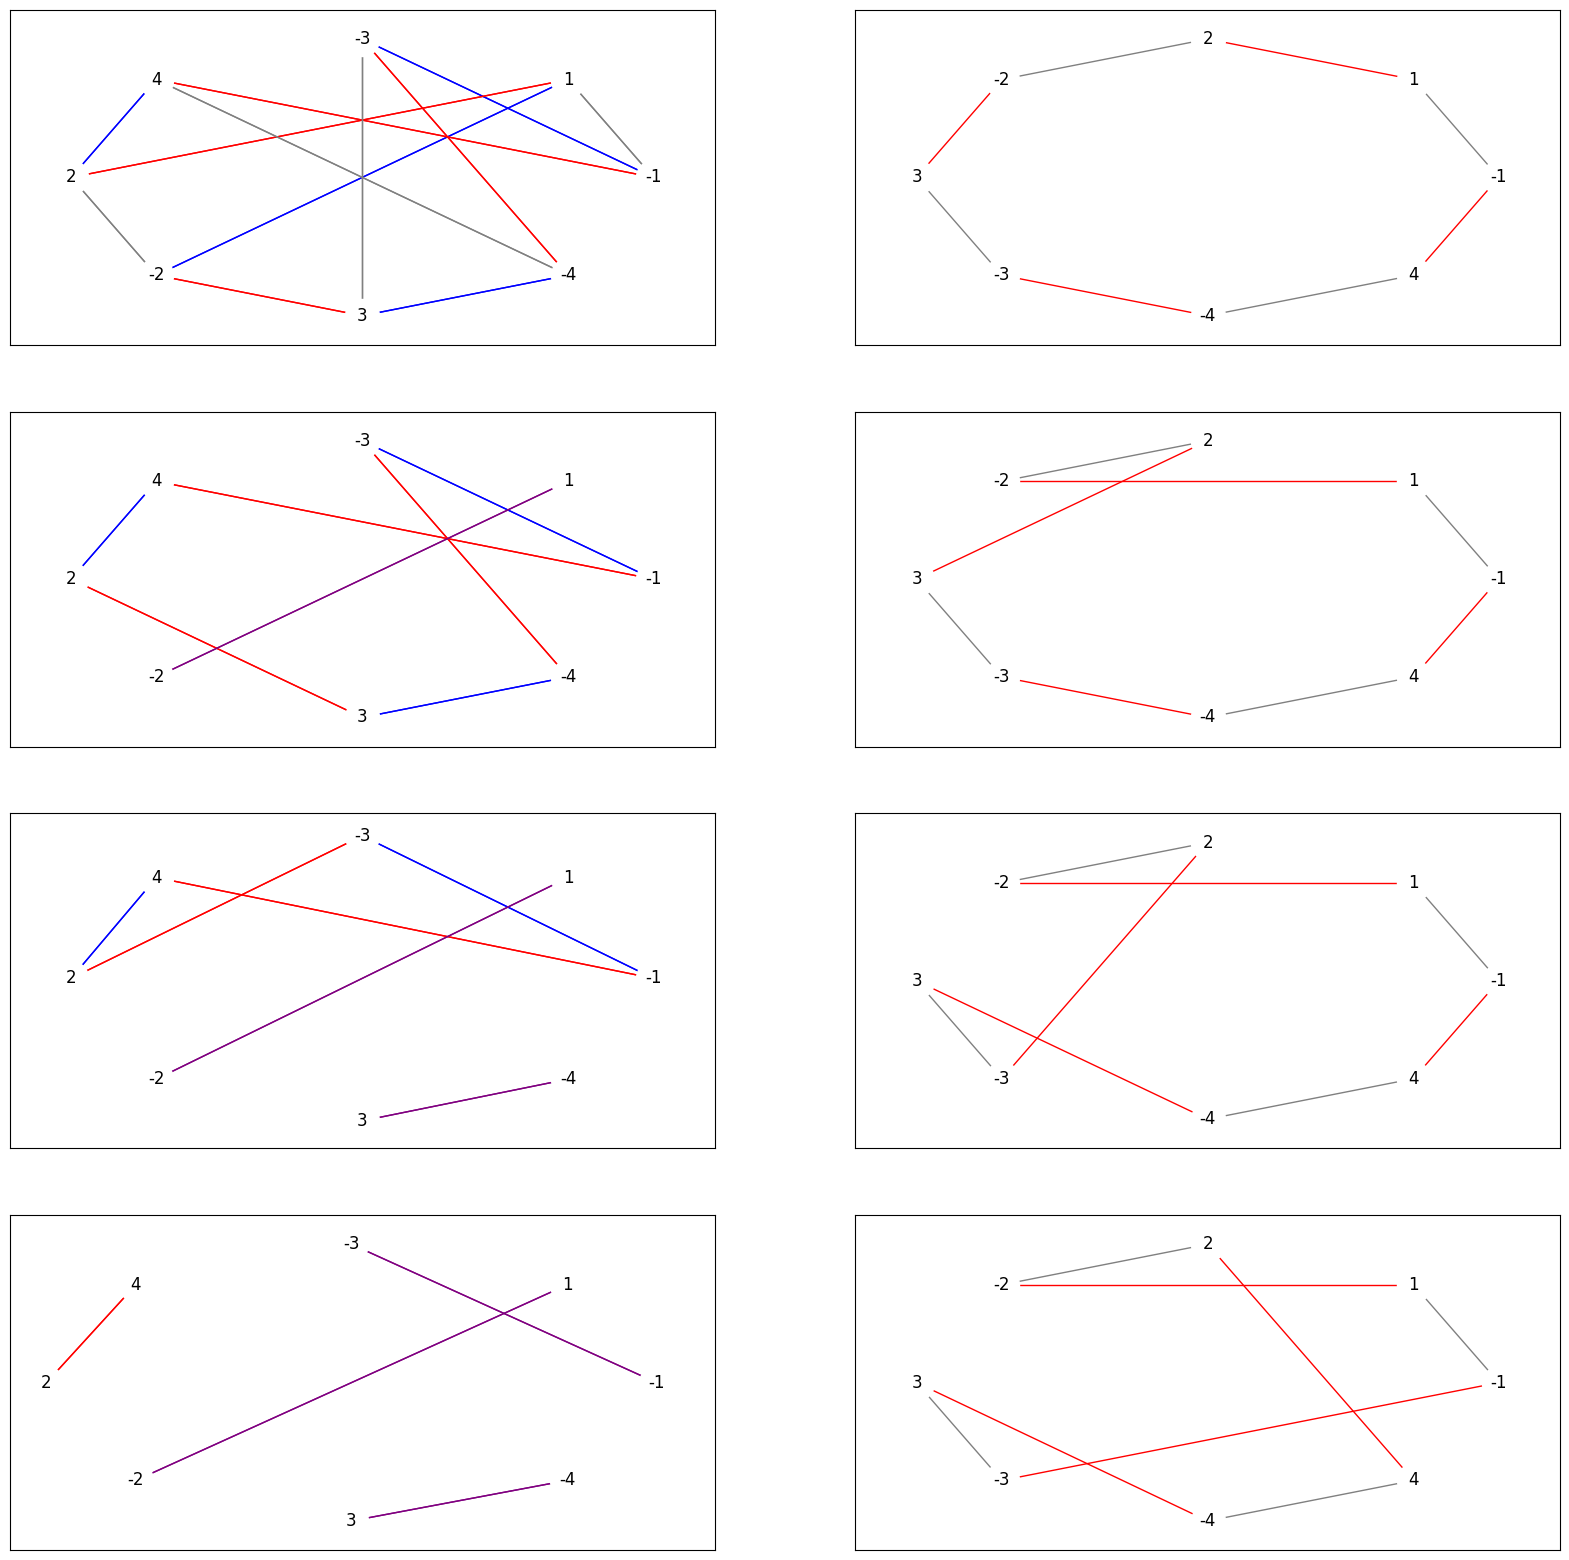

In [56]:
steps = Topic6_helper.shortest_rearrangement_scenario([pd.Series([1,-2,-3,4])],[pd.Series([1,2,-4,-3])])
steps

In [49]:
# Don't forget to push!

# Test your code

In [52]:
%%bash -s "$USERNAME"

cd csc-448-$1/tests
pytest test_Topic6.py::test_exercise_2

============================= test session starts ==============================
platform darwin -- Python 3.9.6, pytest-8.3.3, pluggy-1.5.0
rootdir: /Users/pander14/GitHub/csc-448-instructor/tests
plugins: anyio-4.6.0
collected 1 item

test_Topic6.py .                                                         [100%]

=============================== warnings summary ===============================
test_Topic6.py::test_exercise_2
test_Topic6.py::test_exercise_2
test_Topic6.py::test_exercise_2
test_Topic6.py::test_exercise_2
test_Topic6.py::test_exercise_2
test_Topic6.py::test_exercise_2
test_Topic6.py::test_exercise_2
test_Topic6.py::test_exercise_2
  /Users/pander14/GitHub/csc-448-instructor/tests/../py448/Topic6_helper.py:44: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
    loc = int(np.where((P == k) | (P == -k))

# Colab End Section - Submit your code

In [ ]:
%%bash -s "$USERNAME"

eval "$(ssh-agent -s)"

ssh-add ~/.ssh/id_ed25519

ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts

cd csc-448-$1
./command_line_sync.sh

In [1]:
!pwd

/Users/pander14/GitHub/csc-448-instructor/topics


In [3]:
import joblib
answers = joblib.load('../tests/answers_Topic6.joblib')
answers.keys()

dict_keys(['exercise_1_means', 'exercise_1_stdevs', 'exercise_2', 'exercise_3_nbreakpoints_P2', 'exercise_3_nbreakpoints_P3', 'exercise4_edge_list', 'exercise5_edge_list', 'exercise6_ncycles', 'exercise6_nblocks', 'exercise7_distance', 'exercise8_colors', 'exercise9_last_step'])

In [4]:
answers['exercise9_last_step']

{(1, 2, -4, -3)}